In [105]:
import json

import matplotlib.pyplot as plt
import numpy as np

In [106]:
file = "result23_07.txt"
with open(file) as f:
    lines = f.readlines()
print(len(lines))

894


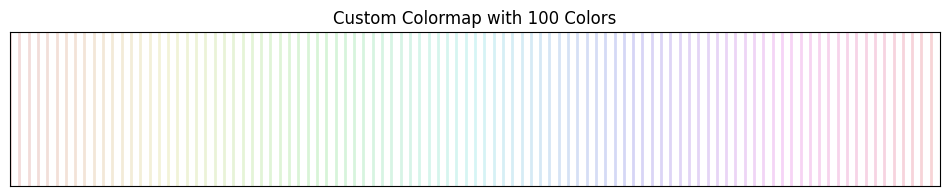

In [107]:
import colorsys


def generate_husl_colormap(n):
    # Generate colors in HUSL color space
    husl_colors = [
        colorsys.hls_to_rgb(h / 360.0, 0.9, l)
        for h, l in zip(np.linspace(0, 360, n, endpoint=False), np.linspace(0.5, 0.7, n), strict=False)
    ]
    return husl_colors


def plot_colormap(colors, n):
    fig, ax = plt.subplots(figsize=(12, 2))
    for i, color in enumerate(colors):
        ax.axvline(i, color=color, linewidth=2)
    ax.set_title(f"Custom Colormap with {n} Colors")
    ax.set_xlim(0, n)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


# Generate and plot the colormap with 490 colors
n_colors = 100
colors = generate_husl_colormap(n_colors)
plot_colormap(colors, n_colors)

In [108]:
def get_pareto_front(energies, latencies):
    pareto_front = []
    for energy, latency in zip(energies, latencies, strict=True):
        is_pareto = True
        for energy2, latency2 in zip(energies, latencies, strict=True):
            if energy2 < energy and latency2 < latency:
                is_pareto = False
                break
        if is_pareto:
            pareto_front.append((energy, latency))
    pareto_front = np.array(pareto_front)
    pareto_front = pareto_front[np.argsort(pareto_front[:, 0])]
    return pareto_front

In [109]:
forward_energies = []
forwardbackward_energies = []
forward_latencies = []
forwardbackward_latencies = []

for line in lines:
    dict_line = json.loads(line)
    energy = dict_line["forward"]["energy"]
    if energy > 0.0:
        forward_energies.append(dict_line["forward"]["energy"])
        forwardbackward_energies.append(dict_line["forwardbackward"]["energy"])
        forward_latencies.append(dict_line["forward"]["latency"])
        forwardbackward_latencies.append(dict_line["forwardbackward"]["latency"])

print(len(lines), len(forward_energies))

894 490


In [110]:
# Matplotlib config
from matplotlib.colors import LinearSegmentedColormap

cdict = [
    "#040746",
    "#001842",
    "#04223d",
    "#0e2c38",
    "#193533",
    "#2d3d2b",
    "#414325",
    "#564824",
    "#6d4a2c",
    "#834c3b",
    "#954f53",
    "#a35470",
    "#a75e94",
    "#a16db3",
    "#987dcc",
    "#8a8ede",
    "#7d9ee8",
    "#70afe6",
    "#67bedf",
    "#6bccd3",
    "#76d8c8",
    "#89e3b9",
    "#9feea1",
    "#baf782",
    "#d7ff52",
]
cmap = LinearSegmentedColormap.from_list("test", cdict)
cmap = plt.get_cmap("tab10")
# for i in range(0, len(forward_energies)) :
#     print(i/len(forward_energies), cmap(i/len(forward_energies)))

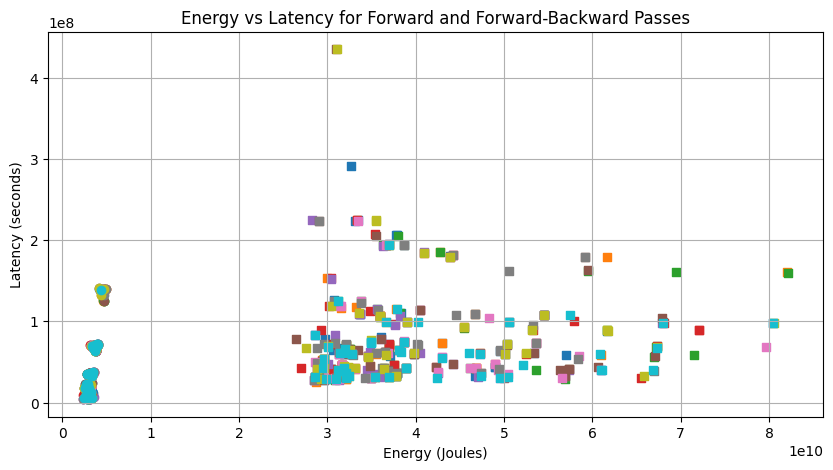

In [111]:
plt.figure(figsize=(10, 5))
for i in range(len(forward_energies)):
    plt.scatter(
        forward_energies[i], forward_latencies[i], color=cmap(i / len(forward_energies)), marker="o", label="Forward"
    )
    plt.scatter(
        forwardbackward_energies[i],
        forwardbackward_latencies[i],
        color=cmap(i / len(forward_energies)),
        marker="s",
        label="Forward-Backward",
    )
plt.xlabel("Energy (Joules)")
plt.ylabel("Latency (seconds)")
plt.title("Energy vs Latency for Forward and Forward-Backward Passes")
# plt.legend()
plt.grid(True)
plt.show()

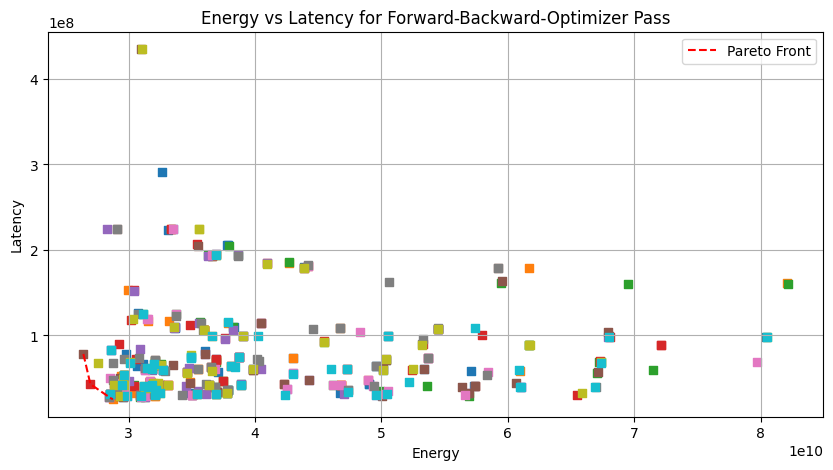

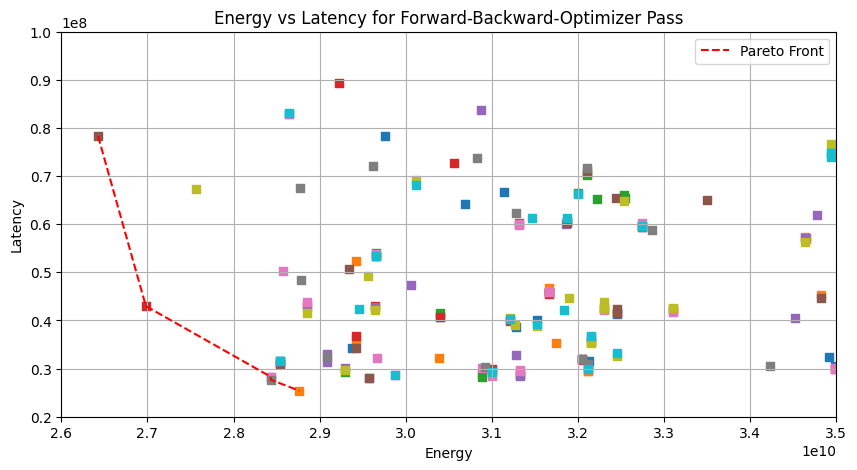

In [112]:
def plot():
    plt.figure(figsize=(10, 5))
    pareto_front = get_pareto_front(forwardbackward_energies, forwardbackward_latencies)
    plt.plot(pareto_front[:, 0], pareto_front[:, 1], "r--", label="Pareto Front")
    for i in range(len(forward_energies)):
        plt.scatter(
            forwardbackward_energies[i], forwardbackward_latencies[i], color=cmap(i / len(forward_energies)), marker="s"
        )

    plt.xlabel("Energy")
    plt.ylabel("Latency")
    plt.title("Energy vs Latency for Forward-Backward-Optimizer Pass")
    plt.legend()
    plt.grid(True)


plot()
plt.show()
plot()
plt.xlim(2.6e10, 3.5e10)
plt.ylim(0.2e8, 1e8)
plt.show()

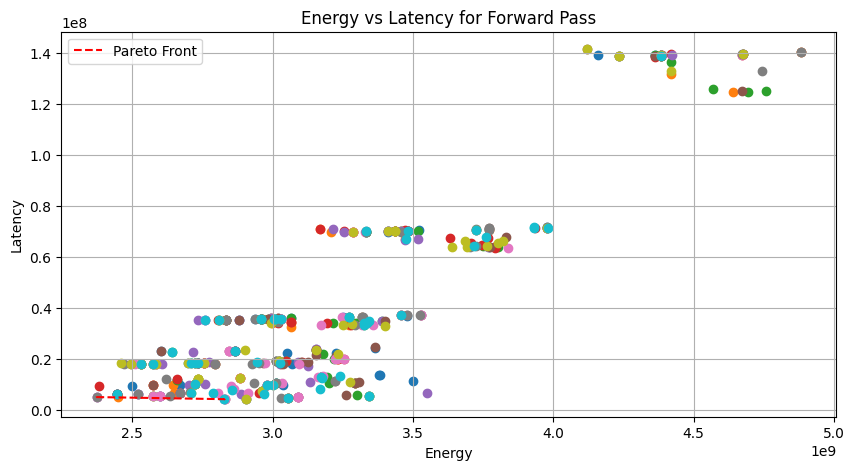

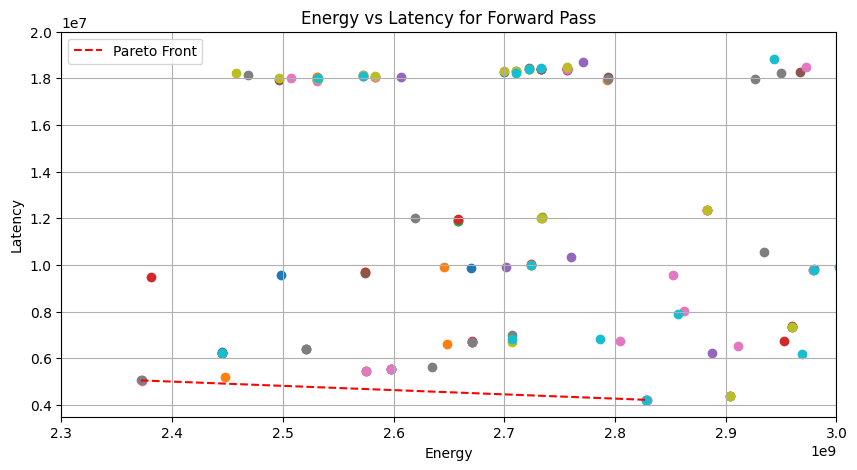

In [113]:
def plot():
    plt.figure(figsize=(10, 5))
    pareto_front = get_pareto_front(forward_energies, forward_latencies)
    plt.plot(pareto_front[:, 0], pareto_front[:, 1], "r--", label="Pareto Front")
    for i in range(len(forward_energies)):
        plt.scatter(forward_energies[i], forward_latencies[i], color=cmap(i / len(forward_energies)), marker="o")

    plt.xlabel("Energy")
    plt.ylabel("Latency")
    plt.title("Energy vs Latency for Forward Pass")
    plt.legend()
    plt.grid(True)


plot()
plt.show()
plot()
plt.xlim(2.3e9, 3e9)
plt.ylim(0.035e8, 0.2e8)
plt.show()